In [1]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/mohamed-ashry7/Data-Engineering-Lab/main/Datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'

### **Data Cleaning Exercise - SF Building permit**


The [Building permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data#Building_Permits.csv) pertains to all types of structural permits from Jan 1, 2013 - Feb 25th 2018 in San Francisco. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications. 

Download the dataset from the link provided and store it in your own data or working folder. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

1. Import the dataset and observe the first few rows

In [2]:
building_permits_df = pd.read_csv(get_path("Building_Permits.csv"),low_memory=False)
building_permits_df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


2. Find out what percent of the building permits dataset is missing.

In [3]:
missing_data_count= building_permits_df.isnull().sum().sum()
all_data_count = np.product(building_permits_df.shape)
(missing_data_count/all_data_count)*100

26.26002315058403

3. Write a code to check the values of the `Street Number Suffix` and `Zipcode` from the building permits datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

In [4]:
building_permits_df['Zipcode'].unique()
building_permits_df['Street Number Suffix'].unique()

#Answer: The street suffix can be non-existant. However, a Zipcode should exist with every city. Therefore, it could be non-existant because it was not recorded.

array([nan, 'A', 'C', 'V', 'B', 'F', 'R', 'D', '0', 'E', 'P', 'G', 'J',
       'K', 'H', 'L', 'I', '½', 'N'], dtype=object)

4. See if you can drop the missing values from the building permits dataset and still keep some data, or drop the columns with missing values and see if you have columns still.

In [5]:
row_dropped = building_permits_df.dropna()
row_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [6]:
col_dropped = building_permits_df.dropna(axis=1)
col_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


5. Try replacing all the `NaN`'s in the building permits data with the one that comes directly after it and then replacing any remaining `NaN`'s with 0. **HINT:** `fillna(method = 'bfill')`

In [7]:
building_permits_df.fillna(method='bfill').fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


6. Create a new dataset at the end with all missing values handled and store as a CSV file.

In [8]:
imputed_df = building_permits_df.fillna(method='bfill').fillna(0)
imputed_df.to_csv('imputed.csv')

### **Data Cleaning Exercise 2: Missing value handling on the Pima**

[Pima Indians Diabetes Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

This is a medical dataset, so an important thing we will do with this dataset is that we will see if the statistical summaries can reveal something about the missing values.

1. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

In [9]:
pima_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',header=None)
pima_df.columns = ['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skinfold thickness','2-Hour serum insulin','BMI',' Diabetes pedigree function','Age','Class variable']
pima_df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Use the describe method used for pandas data frames to obtain a statistucal summary of the dataset.

In [10]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skinfold thickness    768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   BMI                           768 non-null    float64
 6    Diabetes pedigree function   768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class variable                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
pima_df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. There are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value. For example, the `BMI` for a person cannot be 0. See if there are other columns/attributes whose value of 0 does not make sense. An understanding of the medical columns may be needed.

In [ ]:
#3

# 1- Glucose in Plasma cannot be 0.
# 2- Diastolic blood pressure cannot be 0.
# 3- Triceps skinfold thickness cannot be 0.
# 4- 2-Hour serum insulin (mu U/ml) cannot be 0.
# 5- BMI cannot be 0.

In [14]:
# Replace each column in these with np.nan

# pima_df['Plasma glucose concentration']=pima_df['Plasma glucose concentration'].replace(0,np.nan)
# pima_df['Diastolic blood pressure']=pima_df['Diastolic blood pressure'].replace(0,np.nan)
# pima_df['Triceps skinfold thickness']=pima_df['Triceps skinfold thickness'].replace(0,np.nan)
# pima_df['2-Hour serum insulin']=pima_df['2-Hour serum insulin'].replace(0,np.nan)
# pima_df['BMI']=pima_df['BMI'].replace(0,np.nan)
pima_df.iloc[:,1:6] =pima_df.iloc[:,1:6].replace(0,np.nan) 
pima_df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
count,767.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,766.000000
mean,3.850065,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.349869
std,3.368910,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.477240
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Now you can proceed to check the missing values and remove/impute as in exercise 1. Create a new dataset at the ending with all missing values handled and store as a CSV file.

In [15]:
pima_df.isnull().sum()

Number of times pregnant          1
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skinfold thickness      227
2-Hour serum insulin            374
BMI                              11
 Diabetes pedigree function       0
Age                               0
Class variable                    2
dtype: int64

In [16]:
df_pima_cells = np.product(pima_df.shape)#get the number of cells of the dataframe
df_pima_zeros = ((pima_df.isnull()).sum()).sum() # get the number of missing cells

#calculate the percentage 

result = (df_pima_zeros / df_pima_cells)*100
print(result)

9.476273148148149


In [17]:
pima_df[pima_df['Plasma glucose concentration'].isnull()]#get the rows where the glucose concentration is 0

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
75,1.0,NaN,48.0,20.0,NaN,24.7,0.140,22,0.0
182,1.0,NaN,74.0,20.0,23.0,27.7,0.299,21,0.0
342,1.0,NaN,68.0,35.0,NaN,32.0,0.389,22,0.0
349,5.0,NaN,80.0,32.0,NaN,41.0,0.346,37,1.0
502,6.0,NaN,68.0,41.0,NaN,39.0,0.727,41,1.0


Seems like 4/5 of the missing values have the 2-hour serum insulin missing too. To impute the values of the missing Plasma glucose concentration, plot a distributional chart to see if data is normally distributed. If that's the case, we'll use the mean to compute the plasma glucose concentration. Otherwise, we'll use the median.

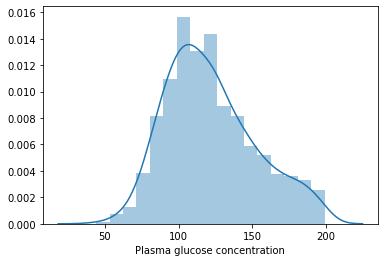

In [18]:
import seaborn as sns

sns.distplot(pima_df['Plasma glucose concentration'],kde=True)

Since, the data is normally distributed, we'll use the mean to compute the glucose missing values, for the rows that have 0 `2-Hour serium insulin` as well.

In [47]:
mean_plasma = pima_df['Plasma glucose concentration'].notnull().mean()
pima_df['Plasma glucose concentration'] =pima_df['Plasma glucose concentration'].fillna(mean_plasma)


We will repeat the same process for the other columns

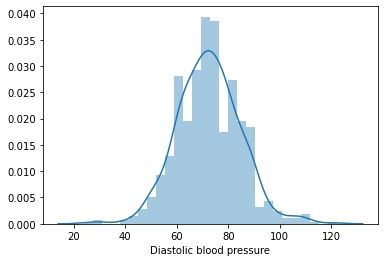

In [48]:

sns.distplot(pima_df['Diastolic blood pressure'],kde=True)

In [49]:
# it is normalized
mean_blood = pima_df['Diastolic blood pressure'].notnull().mean()
pima_df['Diastolic blood pressure'] =pima_df['Diastolic blood pressure'].fillna(mean_blood)


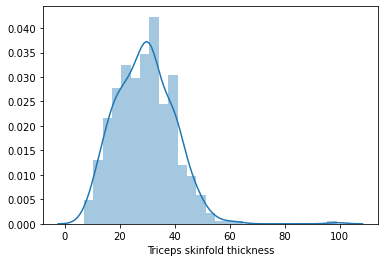

In [50]:
sns.distplot(pima_df['Triceps skinfold thickness'],kde=True)

In [51]:
# it is normalized
mean_tri = pima_df['Triceps skinfold thickness'].notnull().mean()
pima_df['Triceps skinfold thickness'] =pima_df['Triceps skinfold thickness'].fillna(mean_tri)


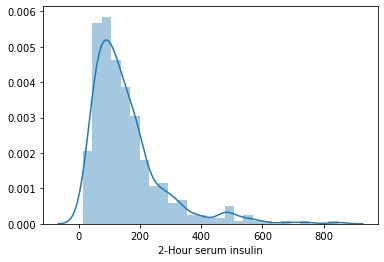

In [52]:
sns.distplot(pima_df['2-Hour serum insulin'],kde=True)

In [53]:
# it is not normalized
median_serum = pima_df['2-Hour serum insulin'].notnull().median()
pima_df['2-Hour serum insulin'] =pima_df['2-Hour serum insulin'].fillna(median_serum)


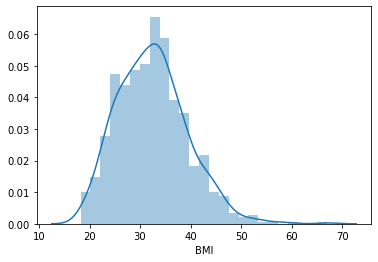

In [54]:
sns.distplot(pima_df['BMI'],kde=True)

In [55]:
# it is normalized
mean_bmi = pima_df['BMI'].notnull().mean()
pima_df['BMI'] =pima_df['BMI'].fillna(mean_bmi)


In [56]:
pima_df.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
BMI                             0
 Diabetes pedigree function     0
Age                             0
Class variable                  0
dtype: int64